In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset0 = pd.read_csv("09_Nasapower_Climate_Monthly_Mersin_FinalVersion.csv",index_col=0)

In [3]:
dataset0.head()

,2m Air Temperature (°C),2m Relative Humidity (%),2m Wind Speed (m/s),Global Solar Radiation (MJ/m2/day),Total Precipitation (mm),Tmax_at 2 Meters(°C),Tmin_at 2 Meters(°C),J(Day of Year),ET0_FAO56_mm,Water_Balance_mm,SPEI_1,Drought_Class
Date,,,,,,,,,,,,
1981-01-15,1.32,82.24,3.50,7.75,174.17,14.37,0.40,15,1.097203,173.072797,4.331873,Extremely Wet
1981-02-15,1.11,83.43,2.46,11.20,88.69,16.37,1.25,46,1.256133,87.433867,1.745743,Severely Wet
1981-03-15,5.94,76.62,2.54,15.57,24.21,22.62,3.47,74,2.348252,21.861748,-0.234408,Normal
1981-04-15,8.70,66.20,2.03,18.91,26.42,29.12,2.41,105,3.664460,22.755540,-0.207417,Normal
1981-05-15,12.27,61.53,2.15,22.75,26.41,36.76,7.65,135,5.601238,20.808762,-0.266206,Normal


In [4]:
dataset0 = dataset0.reset_index()

In [5]:
dataset0['Date'] = pd.to_datetime(dataset0['Date'], errors='coerce')

In [6]:
dataset0.set_index('Date', inplace=True)

In [7]:
dataset0["Drought_Class"].unique()

array(['Extremely Wet', 'Severely Wet', 'Normal', 'Moderately Dry',
       'Moderately Wet'], dtype=object)

In [8]:
dataset0.head()

,2m Air Temperature (°C),2m Relative Humidity (%),2m Wind Speed (m/s),Global Solar Radiation (MJ/m2/day),Total Precipitation (mm),Tmax_at 2 Meters(°C),Tmin_at 2 Meters(°C),J(Day of Year),ET0_FAO56_mm,Water_Balance_mm,SPEI_1,Drought_Class
Date,,,,,,,,,,,,
1981-01-15,1.32,82.24,3.50,7.75,174.17,14.37,0.40,15,1.097203,173.072797,4.331873,Extremely Wet
1981-02-15,1.11,83.43,2.46,11.20,88.69,16.37,1.25,46,1.256133,87.433867,1.745743,Severely Wet
1981-03-15,5.94,76.62,2.54,15.57,24.21,22.62,3.47,74,2.348252,21.861748,-0.234408,Normal
1981-04-15,8.70,66.20,2.03,18.91,26.42,29.12,2.41,105,3.664460,22.755540,-0.207417,Normal
1981-05-15,12.27,61.53,2.15,22.75,26.41,36.76,7.65,135,5.601238,20.808762,-0.266206,Normal


In [9]:
#dataset0['Next Month'] = df['Durum'].shift(-1)

In [10]:
sequent_mapping = {
    'Moderately Dry': 0,
    'Normal': 1,
    'Moderately Wet': 2,
    'Severely Wet': 3,
    'Extremely Wet': 4
}

In [11]:
dataset0['Encoded_Target'] = dataset0['Drought_Class'].map(sequent_mapping)

In [12]:
dataset0.head()

,2m Air Temperature (°C),2m Relative Humidity (%),2m Wind Speed (m/s),Global Solar Radiation (MJ/m2/day),Total Precipitation (mm),Tmax_at 2 Meters(°C),Tmin_at 2 Meters(°C),J(Day of Year),ET0_FAO56_mm,Water_Balance_mm,SPEI_1,Drought_Class,Encoded_Target
Date,,,,,,,,,,,,,
1981-01-15,1.32,82.24,3.50,7.75,174.17,14.37,0.40,15,1.097203,173.072797,4.331873,Extremely Wet,4
1981-02-15,1.11,83.43,2.46,11.20,88.69,16.37,1.25,46,1.256133,87.433867,1.745743,Severely Wet,3
1981-03-15,5.94,76.62,2.54,15.57,24.21,22.62,3.47,74,2.348252,21.861748,-0.234408,Normal,1
1981-04-15,8.70,66.20,2.03,18.91,26.42,29.12,2.41,105,3.664460,22.755540,-0.207417,Normal,1
1981-05-15,12.27,61.53,2.15,22.75,26.41,36.76,7.65,135,5.601238,20.808762,-0.266206,Normal,1


In [13]:
dataset1=dataset0.drop("Drought_Class",axis=1)

In [14]:
dataset1.head()

,2m Air Temperature (°C),2m Relative Humidity (%),2m Wind Speed (m/s),Global Solar Radiation (MJ/m2/day),Total Precipitation (mm),Tmax_at 2 Meters(°C),Tmin_at 2 Meters(°C),J(Day of Year),ET0_FAO56_mm,Water_Balance_mm,SPEI_1,Encoded_Target
Date,,,,,,,,,,,,
1981-01-15,1.32,82.24,3.50,7.75,174.17,14.37,0.40,15,1.097203,173.072797,4.331873,4
1981-02-15,1.11,83.43,2.46,11.20,88.69,16.37,1.25,46,1.256133,87.433867,1.745743,3
1981-03-15,5.94,76.62,2.54,15.57,24.21,22.62,3.47,74,2.348252,21.861748,-0.234408,1
1981-04-15,8.70,66.20,2.03,18.91,26.42,29.12,2.41,105,3.664460,22.755540,-0.207417,1
1981-05-15,12.27,61.53,2.15,22.75,26.41,36.76,7.65,135,5.601238,20.808762,-0.266206,1


In [15]:
dataset1['Next Month'] = dataset1['Encoded_Target'].shift(-1)

In [16]:
#Sliding window Algorithm applied

In [17]:
dataset1.tail()

,2m Air Temperature (°C),2m Relative Humidity (%),2m Wind Speed (m/s),Global Solar Radiation (MJ/m2/day),Total Precipitation (mm),Tmax_at 2 Meters(°C),Tmin_at 2 Meters(°C),J(Day of Year),ET0_FAO56_mm,Water_Balance_mm,SPEI_1,Encoded_Target,Next Month
Date,,,,,,,,,,,,,
2025-08-15,26.03,31.23,2.09,22.98,1.90,47.23,24.61,227,9.788980,-7.888980,-1.132822,0,0.0
2025-09-15,19.84,39.16,2.13,19.22,3.19,39.93,19.42,258,7.239222,-4.049222,-1.016869,0,1.0
2025-10-15,14.06,14.06,14.06,14.06,14.06,33.35,12.09,288,17.280205,-3.220205,-0.991834,1,1.0
2025-11-15,9.39,9.39,9.39,9.39,9.39,10.84,10.84,319,6.718443,2.671557,-0.813914,1,1.0
2025-12-15,7.03,7.03,7.03,7.03,7.03,5.57,5.57,349,4.432961,2.597039,-0.816165,1,NaN


In [18]:
#I offset the columns down by one row for next month's forecast.

In [19]:
dataset2=dataset1.drop("Encoded_Target",axis=1)

In [20]:
dataset2.dropna(inplace=True)

In [21]:
dataset2['Next Month'] = dataset2['Next Month'].astype(int)

In [22]:
dataset2.tail()

,2m Air Temperature (°C),2m Relative Humidity (%),2m Wind Speed (m/s),Global Solar Radiation (MJ/m2/day),Total Precipitation (mm),Tmax_at 2 Meters(°C),Tmin_at 2 Meters(°C),J(Day of Year),ET0_FAO56_mm,Water_Balance_mm,SPEI_1,Next Month
Date,,,,,,,,,,,,
2025-07-15,26.42,30.49,2.15,23.16,5.18,45.68,21.44,196,9.405440,-4.225440,-1.022190,0
2025-08-15,26.03,31.23,2.09,22.98,1.90,47.23,24.61,227,9.788980,-7.888980,-1.132822,0
2025-09-15,19.84,39.16,2.13,19.22,3.19,39.93,19.42,258,7.239222,-4.049222,-1.016869,1
2025-10-15,14.06,14.06,14.06,14.06,14.06,33.35,12.09,288,17.280205,-3.220205,-0.991834,1
2025-11-15,9.39,9.39,9.39,9.39,9.39,10.84,10.84,319,6.718443,2.671557,-0.813914,1


In [23]:
dataset3 = dataset2.reset_index()

In [24]:
corr_matrix=dataset3.corr().abs()

In [25]:
corr_matrix

,Date,2m Air Temperature (°C),2m Relative Humidity (%),2m Wind Speed (m/s),Global Solar Radiation (MJ/m2/day),Total Precipitation (mm),Tmax_at 2 Meters(°C),Tmin_at 2 Meters(°C),J(Day of Year),ET0_FAO56_mm,Water_Balance_mm,SPEI_1,Next Month
Date,1.000000,0.082615,0.074237,0.036788,0.085839,0.099509,0.067751,0.078946,0.017275,0.071612,0.099759,0.099759,0.077502
2m Air Temperature (°C),0.082615,1.000000,0.920841,0.050894,0.881885,0.639272,0.969564,0.973333,0.291060,0.948046,0.684855,0.684855,0.397635
2m Relative Humidity (%),0.074237,0.920841,1.000000,0.090898,0.774967,0.736598,0.895964,0.908176,0.321469,0.926610,0.774181,0.774181,0.329642
2m Wind Speed (m/s),0.036788,0.050894,0.090898,1.000000,0.032132,0.064032,0.100262,0.058808,0.100937,0.161758,0.045463,0.045463,0.051890
Global Solar Radiation (MJ/m2/day),0.085839,0.881885,0.774967,0.032132,1.000000,0.626727,0.872228,0.822003,0.045330,0.901835,0.668927,0.668927,0.527022
Total Precipitation (mm),0.099509,0.639272,0.736598,0.064032,0.626727,1.000000,0.640599,0.627206,0.071825,0.666739,0.997742,0.997742,0.286115
Tmax_at 2 Meters(°C),0.067751,0.969564,0.895964,0.100262,0.872228,0.640599,1.000000,0.931599,0.304436,0.933312,0.684771,0.684771,0.384023
Tmin_at 2 Meters(°C),0.078946,0.973333,0.908176,0.058808,0.822003,0.627206,0.931599,1.000000,0.346511,0.922188,0.671210,0.671210,0.357299
J(Day of Year),0.017275,0.291060,0.321469,0.100937,0.045330,0.071825,0.304436,0.346511,1.000000,0.185376,0.084053,0.084053,0.249834
ET0_FAO56_mm,0.071612,0.948046,0.926610,0.161758,0.901835,0.666739,0.933312,0.922188,0.185376,1.000000,0.715291,0.715291,0.456054


In [26]:
def drop_columns_Redundancy(dataset1, threshold):
    columns_drop = set()
    
    
    for i in range(len(corr_matrix.columns)):  
       #The inner loop should be indented by 4 spaces relative to the previous for loop.
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                
                columns_drop.add(corr_matrix.columns[i])
                
    return columns_drop #The return statement must also be inside the def block.
#If I don't use a set collection, it adds multiple identical columns since common columns are highly correlated.

In [27]:
dropped_columns=drop_columns_Redundancy(corr_matrix,0.90)

In [28]:
dropped_columns

{'2m Relative Humidity (%)',
 'ET0_FAO56_mm',
 'SPEI_1',
 'Tmax_at 2 Meters(°C)',
 'Tmin_at 2 Meters(°C)',
 'Water_Balance_mm'}

In [29]:
X = dataset3.drop(['Date', 'Next Month','ET0_FAO56_mm','Water_Balance_mm','SPEI_1','2m Air Temperature (°C)'], axis=1)

In [30]:
#They have high correlation, so we dropped to get best solution.

In [31]:
y = dataset3['Next Month']

In [32]:
X.head()

,2m Relative Humidity (%),2m Wind Speed (m/s),Global Solar Radiation (MJ/m2/day),Total Precipitation (mm),Tmax_at 2 Meters(°C),Tmin_at 2 Meters(°C),J(Day of Year)
0,82.24,3.50,7.75,174.17,14.37,0.40,15
1,83.43,2.46,11.20,88.69,16.37,1.25,46
2,76.62,2.54,15.57,24.21,22.62,3.47,74
3,66.20,2.03,18.91,26.42,29.12,2.41,105
4,61.53,2.15,22.75,26.41,36.76,7.65,135


Let's also check the correlations; if we find high correlation, we'll remove them so it doesn't confuse the model when assigning coefficients.

In [33]:
y.head()

0    3
1    1
2    1
3    1
4    1
Name: Next Month, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

If you shuffle the data like in classic machine learning projects, the model might try to predict 2024 using 2025 data. Golden Rule: shuffle=False.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.20,  
    shuffle=False   
)

In [38]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier

In [40]:
LogReg = OneVsRestClassifier(LogisticRegression(solver='liblinear',class_weight='balanced'))

In [41]:
LogReg.fit(X_train_scaled, y_train)

OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 solver='liblinear'))

In [42]:
y_pred = LogReg.predict(X_test_scaled)

In [43]:
y_pred

array([3, 1, 1, 1, 1, 1, 0, 0, 0, 4, 4, 4, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 4, 3, 1, 1, 1, 1, 0, 0, 0, 0, 2, 4, 4, 4, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 4, 4, 3, 1, 1, 1, 1, 0, 0, 0, 0, 1, 4, 4, 3, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 2, 4, 3, 1, 1, 1, 1, 1, 0, 0, 0, 4, 4, 4, 3, 2, 1, 1,
       1, 1, 0, 0, 0, 2, 4, 4, 3, 1, 1, 1, 1, 0, 0, 0, 0, 4, 3, 3])

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
#results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5370370370370371

Confusion Matrix:
 [[15  2  1  0  0]
 [18 39  4  7 12]
 [ 0  1  0  0  3]
 [ 0  0  0  2  1]
 [ 0  0  0  1  2]]

Detailed Report:
               precision    recall  f1-score   support

           0       0.45      0.83      0.59        18
           1       0.93      0.49      0.64        80
           2       0.00      0.00      0.00         4
           3       0.20      0.67      0.31         3
           4       0.11      0.67      0.19         3

    accuracy                           0.54       108
   macro avg       0.34      0.53      0.35       108
weighted avg       0.77      0.54      0.59       108



In [46]:
# 1. # 1. Merge Target Variables (Mapping)
# Mapping 3 and 4 to 2.
y_train_new = y_train.replace({3: 2, 4: 2})
y_test_new = y_test.replace({3: 2, 4: 2})

LogReg_New = OneVsRestClassifier(LogisticRegression(solver='liblinear', class_weight='balanced'))
LogReg_New.fit(X_train_scaled, y_train_new)


OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 solver='liblinear'))

In [47]:
y_pred_new = LogReg_New.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test_new, y_pred_new))
print("New condition (3 classes):")
print(classification_report(y_test_new, y_pred_new))

Accuracy: 0.6203703703703703
New condition (3 classes):
              precision    recall  f1-score   support

           0       0.45      0.83      0.59        18
           1       0.91      0.54      0.68        80
           2       0.32      0.90      0.47        10

    accuracy                           0.62       108
   macro avg       0.56      0.76      0.58       108
weighted avg       0.78      0.62      0.64       108



In [48]:
#2025-12-01 Tarihi tahmini	çıktısı	

In [49]:
new_data={'2m Relative Humidity (%)': [66.47],             # Örn: Biraz nemli
    '2m Wind Speed (m/s)': [1.24],          # Örn: Hafif rüzgar
    'Global Solar Radiation (MJ/m2/day)': [10.29],
    'Total Precipitation (mm)': [0.3],   
    'Tmax_at 2 Meters(°C)': [18.19],
    'Tmin_at 2 Meters(°C)': [9.0],
    'J(Day of Year)': [335],                
         }

In [50]:
new_data1 = pd.DataFrame(new_data)
new_data2=scaler.transform(new_data1)

In [51]:
tahmin1_3=LogReg_New.predict(new_data2)
print("Prediction Result1:", tahmin1_3)

Prediction Result1: [2]


In [52]:
#What if we feed it into a model that works with 5 classes instead of 3

In [53]:
tahmin2_4 = LogReg.predict(new_data2)
print("Prediction Result2:", tahmin2_4)

Prediction Result2: [3]


In [54]:
#"Hyperparameter tuning: now we’ll perform the fine-tuning ourselves and build the model.

In [55]:
#"We will find the best hyperparameter settings using GridSearch.

In [56]:
#model_advanced=OneVsRestClassifier(LogisticRegression())

In [57]:
penalty=[None,'l2','l1','elasticnet']
#c_values=[100,10,1,0.1,0.01],C=10 We achieved the maximum score here, so let’s focus on this range.
c_values=[7,9,10,11,13,15,17,20]
solver=['saga','lbfgs','newton-cg','newton-cg','newton-cholesky','sag']
"""weights_to_try = [
    None,                               
    'balanced',                         
    {0: 1.5, 1: 1, 2: 2},               
    {0: 2,   1: 1, 2: 4},               
    {0: 3,   1: 1, 2: 6},               
    {0: 4,   1: 1, 2: 10},              
    {0: 5,   1: 1, 2: 15},              
]"""
weights_to_try = [
    None,                               
    'balanced']
#with this method:Accuracy: 0.5740740740740741 obtained.
#but,Achieved high recall (90%) for critical events via aggressive class weighting,
#accepting a precision-recall trade-off and lower overall accuracy.
max_iter = [100,1000,5000]
params = {
    'solver': ['saga','lbfgs','newton-cg','newton-cg','newton-cholesky','sag'],       
    'C': [7,9,10,11,13,15,17,20],               
    'class_weight': weights_to_try,     
    'penalty': [None,'l2','l1','elasticnet'],                     
    'max_iter': [100,1000,5000],
}

In [58]:
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit

In [59]:
cv1=TimeSeriesSplit(n_splits=5)

In [60]:
#OneVsOneClassifier(LogisticRegression())

In [61]:
#OneVsRestClassifier(LogisticRegression())

In [62]:
grid_modeli = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=params,
   
    cv=cv1,  
    
    scoring='f1_macro', # We use F1-score or Recall for imbalanced data.
    n_jobs=-1,
    verbose=1
)

In [63]:
grid_modeli.fit(X_train_scaled, y_train_new)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2640 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solve

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [7, 9, 10, 11, 13, 15, 17, 20],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 1000, 5000],
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'solver': ['saga', 'lbfgs', 'newton-cg', 'newton-cg',
                                    'newton-cholesky', 'sag']},
             scoring='f1_macro', verbose=1)

In [64]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
#The best parameters can be found under the best_params_

In [66]:
grid_modeli.best_params_

{'C': 7,
 'class_weight': None,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'saga'}

In [67]:
#Since this is my best penalty coefficient, let's focus on this range and update the C values above.

In [68]:
grid_modeli.best_score_

np.float64(0.6282926060325372)

In [69]:
#With 5 classes, the score is 0.3614; whereas with 3 classes, it increases to 0.6283.

In [70]:
y_pred2=grid_modeli.predict(X_test_scaled)
#results
print("Accuracy:", accuracy_score(y_test_new, y_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_new, y_pred2))
print("\nDetailed Report:\n", classification_report(y_test_new, y_pred2))

Accuracy: 0.7037037037037037

Confusion Matrix:
 [[ 8 10  0]
 [11 64  5]
 [ 0  6  4]]

Detailed Report:
               precision    recall  f1-score   support

           0       0.42      0.44      0.43        18
           1       0.80      0.80      0.80        80
           2       0.44      0.40      0.42        10

    accuracy                           0.70       108
   macro avg       0.56      0.55      0.55       108
weighted avg       0.70      0.70      0.70       108



We achieved a max score of 0.7037 with C=10 from the initial list [100, 10, 1, 0.1, 0.01]. We then focused on that range by testing [7, 9, 10, 11, 13, 15, 17, 20], result is C=7.

In [71]:
# random search cv
#We can also try RandomizedSearchCV to get best result.

In [72]:
#2025-12-01 Tarihi tahmini	çıktısı

In [73]:
grid_modeli.predict(new_data2)

array([2])

In [74]:
#AUC VE ROC

When you leave the LogisticRegression() parentheses empty or remove the multi_class parameter, Scikit-Learn uses multi_class='auto' by default.Score increases compared to "ovr" parameter.

if the dataset is unbalanced,Score can be lower.

In [75]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [76]:
y_test_binarized = label_binarize(y_test_new, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]
y_score = grid_modeli.best_estimator_.predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



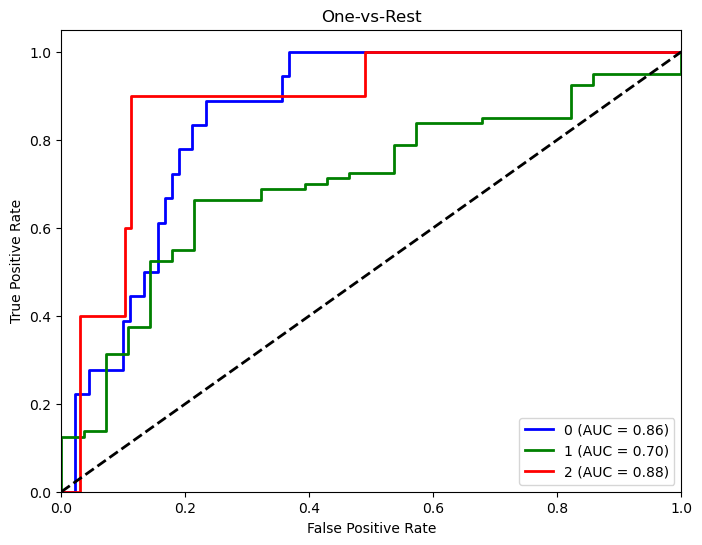

In [82]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
class_names = ['0', '1', '2']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest')
plt.legend(loc="lower right")
plt.savefig("resultROCVSAUC.png")
plt.show()

In [80]:
macro_auc = roc_auc_score(y_test_new, y_score, multi_class='ovr', average='macro')
print(f"Macro AUC: {macro_auc:.4f}")

Macro AUC: 0.8145
